# ECG

## google coolab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 5.1 MB/s eta 0:00:00


## data downloader

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Clean up the environment
!rm -r *
!ls

# Step 3: Download datasets
!wget https://physionet.org/static/published-projects/qtdb/qt-database-1.0.0.zip
!wget https://physionet.org/static/published-projects/nstdb/mit-bih-noise-stress-test-database-1.0.0.zip
!ls
print('Downloading data: Done')

# Step 4: Create a directory for data
!mkdir data

# Step 5: Unzip the datasets
!unzip qt-database-1.0.0.zip >> /dev/null
!unzip mit-bih-noise-stress-test-database-1.0.0.zip >> /dev/null

# Step 6: Move the extracted folders to the data directory
!mv qt-database-1.0.0 data/
!mv mit-bih-noise-stress-test-database-1.0.0 data/

# Step 7: Remove the zip files
!rm qt-database-1.0.0.zip
!rm mit-bih-noise-stress-test-database-1.0.0.zip
!ls
!ls data
print('Extracting data: Done')

# Step 8: Move the data directory to Google Drive
!mv data /content/drive/My\ Drive/
print('Data saved to Google Drive.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
rm: cannot remove 'drive/MyDrive': Operation canceled
rm: cannot remove 'drive/.shortcut-targets-by-id': Operation canceled
rm: cannot remove 'drive/.file-revisions-by-id': Operation canceled
rm: cannot remove 'drive/.Trash-0/files': No such file or directory
rm: cannot remove 'drive/.Trash-0/info': No such file or directory
drive
--2024-10-02 11:01:17--  https://physionet.org/static/published-projects/qtdb/qt-database-1.0.0.zip
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87119682 (83M) [application/zip]
Saving to: ‘qt-database-1.0.0.zip’

qt-database-1.0.0.z 100%[===================>]  83.08M   625KB/s    in 2m 16s  

2024-10-02 11:03:34 (624 KB/s) - ‘qt-database-1.0.0.zip’ saved [87119682/87119682]

--2024-10-02 11:03:

## imports

In [3]:
# Imports
import os
import glob
import numpy as np
from scipy.signal import resample_poly
import wfdb
import math
import _pickle as pickle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization,concatenate, Activation, Input, Conv2DTranspose, Lambda, LSTM, Reshape, Embedding

import keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import collections
import random
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import collections
import random
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply
from tensorflow.keras.models import Model
# model with leakyrelu +self attenuation + residual layer
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply, LSTM, GRU, LeakyReLU
from tensorflow.keras.models import Model
#model with residual and deleteing strides for solving output dimention problem
from keras.layers import Conv1D, Conv1DTranspose, BatchNormalization, Input, Add
# first  **Reinforcement Learning Agent** method at the end it is developed
import keras
from keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from keras import losses
from datetime import datetime
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply, LSTM, GRU, LeakyReLU, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import keras
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

#model with self attenuation layer + residual layer
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU

from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Lambda, Add, Conv1DTranspose
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, Multiply, Dense, LeakyReLU
from tensorflow.keras.models import Model
import numpy as np
import collections
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Add, Multiply, UpSampling1D
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Lambda, Add, Conv2DTranspose
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose
from tensorflow.keras.models import Model
###############################################################################
#model with self attenuation layer + residual layer
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Add, Conv1DTranspose, MaxPooling1D, LayerNormalization, Multiply
from tensorflow.keras.models import model_from_json
import glob
import wfdb
import numpy as np
import math
from scipy.signal import resample_poly
import pickle
from keras.models import Sequential
from keras.layers import LSTM, Dense



## data

In [ ]:
QTpath = '/content/drive/MyDrive/data/qt-database-1.0.0/'
newFs = 360

namesPath = glob.glob(QTpath + "/*.dat")
QTDatabaseSignals = dict()

# Process each file in the dataset
for i in namesPath:
    aux = i.split('.dat')
    register_name = aux[0].split('/')[-1]
    signal, fields = wfdb.rdsamp(aux[0])
    qu = len(signal)

    ann = wfdb.rdann(aux[0], 'pu1')
    anntype = ann.symbol
    annSamples = ann.sample

    Anntype = np.array(anntype)
    idx = Anntype == 'p'
    Pidx = annSamples[idx]
    idxS = Anntype == '('
    Sidx = annSamples[idxS]
    idxR = Anntype == 'N'
    Ridx = annSamples[idxR]

    ind = np.zeros(len(Pidx))

    for j in range(len(Pidx)):
        arr = np.where(Pidx[j] > Sidx)
        arr = arr[0]
        ind[j] = arr[-1]

    ind = ind.astype(np.int64)
    Pstart = Sidx[ind]
    Pstart = Pstart - int(0.04 * fields['fs'])

    auxSig = signal[0:qu, 0]

    beats = list()
    for k in range(len(Pstart) - 1):
        remove = (Ridx > Pstart[k]) & (Ridx < Pstart[k + 1])
        if np.sum(remove) < 2:
            beats.append(auxSig[Pstart[k]:Pstart[k + 1]])

    beatsRe = list()
    for k in range(len(beats)):
        L = math.ceil(len(beats[k]) * newFs / fields['fs'])
        normBeat = list(reversed(beats[k])) + list(beats[k]) + list(reversed(beats[k]))
        res = resample_poly(normBeat, newFs, fields['fs'])
        res = res[L - 1:2 * L - 1]
        beatsRe.append(res)

    QTDatabaseSignals[register_name] = beatsRe

# Step to save the processed signals to Google Drive
with open('/content/drive/My Drive/QTDatabaseSignals.pkl', 'wb') as f:
    pickle.dump(QTDatabaseSignals, f)

print('QTDatabaseSignals saved to Google Drive.')


QTDatabaseSignals saved to Google Drive.


noise(bw ma em)

In [ ]:
NSTDBPath = '/content/drive/MyDrive/data/mit-bih-noise-stress-test-database-1.0.0/bw'
signals, fields = wfdb.rdsamp(NSTDBPath)
for key in fields:
    print(key, fields[key])
np.save('/content/drive/MyDrive/data/NoiseBWL', signals)
with open('/content/drive/MyDrive/data/NoiseBWL.pkl', 'wb') as output:
    pickle.dump(signals, output)
print('=========================================================')
print('MIT BIH data noise stress test database (NSTDB) saved as pickle')

fs 360
sig_len 650000
n_sig 2
base_date None
base_time None
units ['mV', 'mV']
sig_name ['noise1', 'noise2']
comments []
MIT BIH data noise stress test database (NSTDB) saved as pickle


In [ ]:
NSTDBPath = '/content/drive/MyDrive/data/mit-bih-noise-stress-test-database-1.0.0/ma'
signals, fields = wfdb.rdsamp(NSTDBPath)

for key in fields:
    print(key, fields[key])

np.save('/content/drive/MyDrive/data/NoiseMA', signals)
# Save Data
with open('/content/drive/MyDrive/data/NoiseMA.pkl', 'wb') as output:
    pickle.dump(signals, output)
print('=========================================================')
print('MIT BIH data noise stress test database (NSTDB) saved as pickle')

fs 360
sig_len 650000
n_sig 2
base_date None
base_time None
units ['mV', 'mV']
sig_name ['noise1', 'noise2']
comments []
MIT BIH data noise stress test database (NSTDB) saved as pickle


In [ ]:
NSTDBPath = '/content/drive/MyDrive/data/mit-bih-noise-stress-test-database-1.0.0/em'
signals, fields = wfdb.rdsamp(NSTDBPath)

for key in fields:
    print(key, fields[key])

np.save('/content/drive/MyDrive/data/NoiseEM', signals)
# Save Data
with open('/content/drive/MyDrive/data/NoiseEM.pkl', 'wb') as output:
    pickle.dump(signals, output)
print('=========================================================')
print('MIT BIH data noise stress test database (NSTDB) saved as pickle')

fs 360
sig_len 650000
n_sig 2
base_date None
base_time None
units ['mV', 'mV']
sig_name ['noise1', 'noise2']
comments []
MIT BIH data noise stress test database (NSTDB) saved as pickle


## data merging

In [4]:
print('Getting the Data ready ... ')

# The seed is used to ensure the ECG always have the same contamination level
# this enhance reproducibility
seed = 1234
np.random.seed(seed=seed)

# Load QT Database
with open('/content/drive/MyDrive/QTDatabaseSignals.pkl', 'rb') as input:
    # dict {register_name: beats_list}
    qtdb = pickle.load(input)

# Load NSTDB BWT
with open('/content/drive/MyDrive/data/NoiseBWL.pkl', 'rb') as input:
    nstdbwl = pickle.load(input)

# Load NSTDB MA
with open('/content/drive/MyDrive/data/NoiseMA.pkl', 'rb') as input:
    nstdma = pickle.load(input)

# Load NSTDB EN
with open('/content/drive/MyDrive/data/NoiseEM.pkl', 'rb') as input:
    nstdem = pickle.load(input)


# NSTDB

noise_channel1 = nstdbwl[:, 0]
noise_channel2 = nstdbwl[:, 1]

noise_channel3 = nstdma[:, 0]
noise_channel4 = nstdma[:, 1]

noise_channel5 = nstdem[:, 0]
noise_channel6 = nstdem[:, 1]


# Data split

noise_test_bwt = np.concatenate(
    (noise_channel1[0:int(noise_channel1.shape[0] * 0.13)], noise_channel2[0:int(noise_channel2.shape[0] * 0.13)]))
noise_train_bwt = np.concatenate((noise_channel1[int(noise_channel1.shape[0] * 0.13):-1],
                              noise_channel2[int(noise_channel2.shape[0] * 0.13):-1]))

noise_test_ma = np.concatenate(
    (noise_channel3[0:int(noise_channel3.shape[0] * 0.13)], noise_channel4[0:int(noise_channel4.shape[0] * 0.13)]))
noise_train_ma = np.concatenate((noise_channel3[int(noise_channel3.shape[0] * 0.13):-1],
                              noise_channel4[int(noise_channel4.shape[0] * 0.13):-1]))

noise_test_em = np.concatenate(
    (noise_channel5[0:int(noise_channel5.shape[0] * 0.13)], noise_channel6[0:int(noise_channel6.shape[0] * 0.13)]))
noise_train_em = np.concatenate((noise_channel5[int(noise_channel5.shape[0] * 0.13):-1],
                              noise_channel6[int(noise_channel6.shape[0] * 0.13):-1]))


# QTDatabase

beats_train = []
beats_test = []

test_set = ['sel123',  # Record from MIT-BIH Arrhythmia Database
            'sel233',  # Record from MIT-BIH Arrhythmia Database

            'sel302',  # Record from MIT-BIH ST Change Database
            'sel307',  # Record from MIT-BIH ST Change Database

            'sel820',  # Record from MIT-BIH Supraventricular Arrhythmia Database
            'sel853',  # Record from MIT-BIH Supraventricular Arrhythmia Database

            'sel16420',  # Record from MIT-BIH Normal Sinus Rhythm Database
            'sel16795',  # Record from MIT-BIH Normal Sinus Rhythm Database

            'sele0106',  # Record from European ST-T Database
            'sele0121',  # Record from European ST-T Database

            'sel32',  # Record from ``sudden death'' patients from BIH
            'sel49',  # Record from ``sudden death'' patients from BIH

            'sel14046',  # Record from MIT-BIH Long-Term ECG Database
            'sel15814',  # Record from MIT-BIH Long-Term ECG Database
            ]

# Creating the train and test dataset, each datapoint has 512 samples and is zero padded
# beats bigger that 512 samples are discarded to avoid wrong split beats ans to reduce
# computation.
skip_beats = 0
samples = 512
qtdb_keys = list(qtdb.keys())

for i in range(len(qtdb_keys)):
    signal_name = qtdb_keys[i]

    for b in qtdb[signal_name]:

        b_np = np.zeros(samples)
        b_sq = np.array(b)



        init_padding = 16
        if b_sq.shape[0] > (samples - init_padding):
            skip_beats += 1
            continue

        b_np[init_padding:b_sq.shape[0] + init_padding] = b_sq - (b_sq[0] + b_sq[-1]) / 2

        if signal_name in test_set:
            beats_test.append(b_np)
        else:
            beats_train.append(b_np)



sn_train = []
sn_test = []

noise_index = 0

rnd_train = np.random.randint(low=20, high=200, size=len(beats_train)) / 100
for i in range(len(beats_train)):
    beat_max_value = np.max(beats_train[i]) - np.min(beats_train[i])

    noise_bwt = noise_train_bwt[noise_index:noise_index + samples]
    noise_max_value_bwt = np.max(noise_bwt) - np.min(noise_bwt)
    Ase_bwt = noise_max_value_bwt / beat_max_value
    alpha = rnd_train[i] / Ase_bwt

    noise_ma = noise_train_ma[noise_index:noise_index + samples]
    noise_max_value_ma = np.max(noise_ma) - np.min(noise_ma)
    Ase_ma = noise_max_value_ma / beat_max_value
    beta = rnd_train[i] / Ase_ma

    noise_em = noise_train_bwt[noise_index:noise_index + samples]
    noise_max_value_em = np.max(noise_em) - np.min(noise_em)
    Ase_em = noise_max_value_em / beat_max_value
    gamma = rnd_train[i] / Ase_em

    signal_noise = beats_train[i] + alpha/3 * noise_bwt + beta/3 * noise_ma + gamma/3 * noise_em

    sn_train.append(signal_noise)
    noise_index += samples

    if noise_index > (len(noise_train_bwt) - samples):
        noise_index = 0

noise_index = 0
rnd_test = np.random.randint(low=20, high=200, size=len(beats_test)) / 100
for i in range(len(beats_test)):
    beat_max_value = np.max(beats_test[i]) - np.min(beats_test[i])

    noise_bwt = noise_test_bwt[noise_index:noise_index + samples]
    noise_max_value_bwt = np.max(noise_bwt) - np.min(noise_bwt)
    Ase_bwt = noise_max_value_bwt / beat_max_value
    alpha = rnd_test[i] / Ase_bwt

    noise_ma = noise_test_ma[noise_index:noise_index + samples]
    noise_max_value_ma = np.max(noise_ma) - np.min(noise_ma)
    Ase_ma = noise_max_value_ma / beat_max_value
    beta = rnd_test[i] / Ase_ma

    noise_em = noise_test_bwt[noise_index:noise_index + samples]
    noise_max_value_em = np.max(noise_em) - np.min(noise_em)
    Ase_em = noise_max_value_em / beat_max_value
    gamma = rnd_test[i] / Ase_em

    signal_noise = beats_test[i] + alpha/3 * noise_bwt + beta/3 * noise_ma + gamma/3 * noise_em

    sn_test.append(signal_noise)
    noise_index += samples

    if noise_index > (len(noise_test_bwt) - samples):
        noise_index = 0

X_train = np.array(sn_train)
y_train = np.array(beats_train)

X_test = np.array(sn_test)
y_test = np.array(beats_test)

X_train = np.expand_dims(X_train, axis=2)
y_train = np.expand_dims(y_train, axis=2)

X_test = np.expand_dims(X_test, axis=2)
y_test = np.expand_dims(y_test, axis=2)

Dataset = [X_train, y_train, X_test, y_test]

print('Dataset ready to use.')

Getting the Data ready ... 
Dataset ready to use.


In [5]:
print("DATASET SHAPE")
print(f'Training {X_train.shape}')
print(f'Testing {X_test.shape}')

DATASET SHAPE
Training (72002, 512, 1)
Testing (13316, 512, 1)


## DRNN_denoising

In [ ]:

def DRNN_denoising():
    model = Sequential()
    model.add(LSTM(64, input_shape=(512, 1), return_sequences=True))  # Keep return_sequences=True
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))  # Adjusted activation
    model.add(LSTM(64, return_sequences=True))  # Return sequences to keep shape (None, 512, 64)
    model.add(Dense(1, activation='linear'))  # Output shape (None, 512, 1)
    return model

drnn_model = DRNN_denoising()
drnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 512, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512, 64)             │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512, 128)            │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 512, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512, 1)              │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,849 (308.00 KB)

 Trainable params: 78,849 (308.00 KB)

 Non-trainable params: 0 (0.00 B)

## function used during training

In [ ]:
os.makedirs('/content/drive/MyDrive/DRNN_denoising')

In [9]:
from keras.callbacks import LearningRateScheduler

def lr_schedule(epoch, lr):
    """Custom learning rate schedule."""
    if epoch % 5 == 0 and epoch > 10:  # Reduce every 10 epochs
        lr = lr * 0.5  # Reduce the learning rate by half
    return lr

In [ ]:
def train_dl(Dataset, experiment):

    print('Deep Learning pipeline: Training the model for exp ' + str(experiment))

    [X_train, y_train, X_test, y_test] = Dataset

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, shuffle=True, random_state=1)

    if experiment == 'DRNN_denoising':
        # FCN_DAE_leaky
        model =  DRNN_denoising()
        model_label = 'DRNN_denoising'
        criterion = ssd_loss

    print('\n ' + model_label + '\n ')

    model.summary()

    epochs = 100
    batch_size = 32
    lr = 1e-3
    minimum_lr = 1e-20

    model.compile(loss=criterion,
                  optimizer=keras.optimizers.Adam(learning_rate=lr),
                  metrics=[losses.mean_squared_error, ssd_loss])

    # checkpoint
    model_filepath = '/content/drive/MyDrive/DRNN_denoising/'+model_label + '_weights.weights.h5'

    checkpoint = ModelCheckpoint(model_filepath,
                                 monitor="val_loss",
                                 verbose=1,
                                 save_best_only=True,
                                 mode='min',
                                 save_weights_only=True)

    reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                                  factor=0.5,
                                  min_delta=0.01,
                                  mode='min',
                                  patience=2,
                                  min_lr=minimum_lr,
                                  verbose=1)

    early_stop = EarlyStopping(monitor="val_loss",
                               min_delta=0.0001,
                               mode='min',
                               patience=20,
                               verbose=1)
    lr_scheduler = LearningRateScheduler(lr_schedule)


    model.fit(x=X_train, y=y_train,
              validation_data=(X_val, y_val),
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              callbacks=[checkpoint, reduce_lr, early_stop])

    K.clear_session()

In [ ]:
def test_dl(Dataset, experiment):
    print('Deep Learning pipeline: Testing the model')

    [train_set, train_set_GT, X_test, y_test] = Dataset
    batch_size = 32

    if experiment == 'DRNN_denoising':
        model =  DRNN_denoising()
        model_label = 'DRNN_denoising'
        criterion = ssd_loss

    print('\n' + model_label + '\n')
    model.summary()


    # Load weights
    model_filepath = '/content/drive/MyDrive/DRNN_denoising/'+model_label + '_weights.weights.h5'
    model.load_weights(model_filepath)

    # Test score
    y_pred = model.predict(X_test, batch_size=batch_size, verbose=1)
    K.clear_session()
    return [X_test, y_test, y_pred]

## train

In [ ]:
dl_experiments = ['DRNN_denoising']

In [13]:
import tensorflow as tf

def ssd_loss(y_true, y_pred):
    """
    Compute the Sum of Squared Differences Loss.

    Parameters:
    - y_true: Ground truth labels (true values).
    - y_pred: Predicted labels (predicted values).

    Returns:
    - loss: Computed loss value.
    """
    return tf.reduce_mean(tf.square(y_true - y_pred))


In [ ]:
# Assuming dl_experiments is defined and Dataset is ready
for experiment in range(len(dl_experiments)):
    try:
        # Train the model
        print(f'Training model for experiment: {dl_experiments[experiment]}')
        #train_dl(Dataset, dl_experiments[experiment])


        # Test the model
        print(f'Testing model for experiment: {dl_experiments[experiment]}')
        X_test, y_test, y_pred = test_dl(Dataset, dl_experiments[experiment])

        test_results = [X_test, y_test, y_pred]

        # Save Results
        results_filename = f'/content/drive/MyDrive/DRNN_denoising/test_results_{dl_experiments[experiment]}.pkl'
        with open(results_filename, 'wb') as output:
            pickle.dump(test_results, output)

        print(f'Results from experiment {dl_experiments[experiment]} saved to {results_filename}')

    except Exception as e:
        print(f'An error occurred during experiment {dl_experiments[experiment]}: {e}')


Training model for experiment: DRRN_denoising
Testing model for experiment: DRRN_denoising
Deep Learning pipeline: Testing the model

DRRN_denoising



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 512, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512, 64)             │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512, 128)            │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 512, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512, 1)              │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,849 (308.00 KB)

 Trainable params: 78,849 (308.00 KB)

 Non-trainable params: 0 (0.00 B)

417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step
Results from experiment DRRN_denoising saved to /content/drive/MyDrive/DRRN_denoising/test_results_DRRN_denoising.pkl


## test metrics

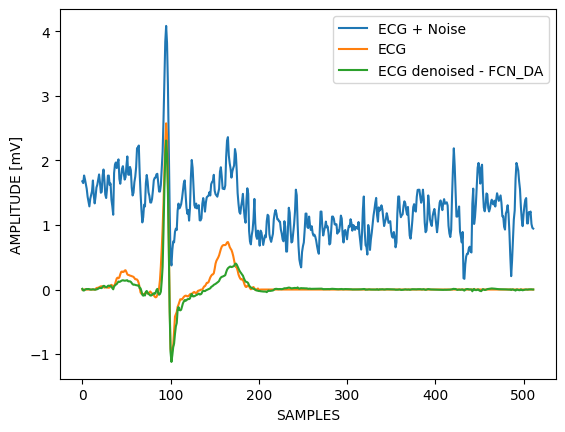

In [24]:
plt.plot(X_test[3390], label="ECG + Noise")
plt.plot(y_test[3390], label="ECG")
plt.plot(y_pred[3390], label="ECG denoised - FCN_DA")

plt.xlabel("SAMPLES")
plt.ylabel("AMPLITUDE [mV]")
plt.legend()
plt.show()

12417


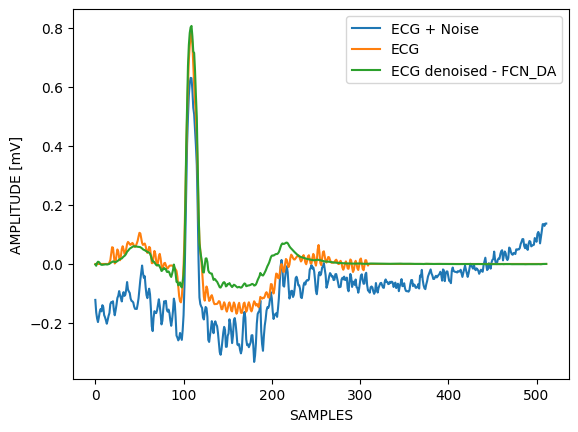

9221


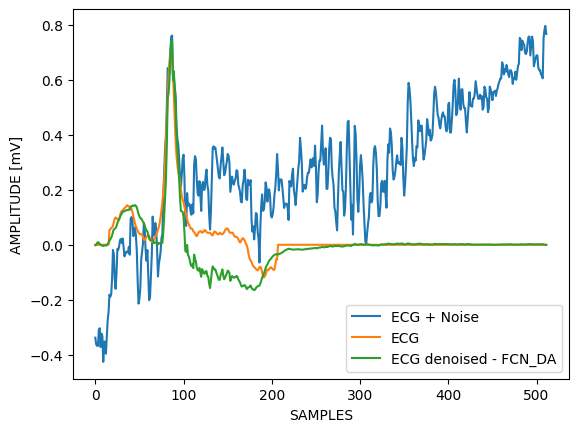

3323


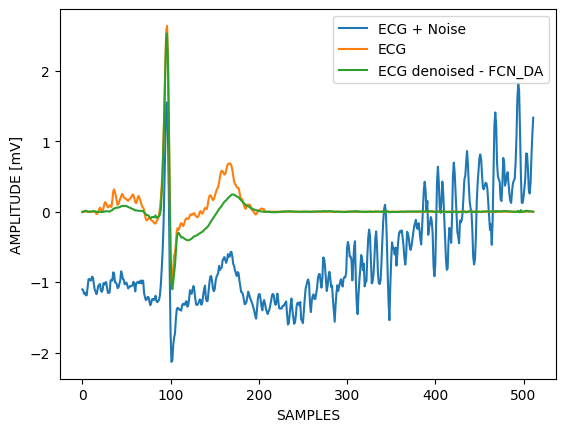

7738


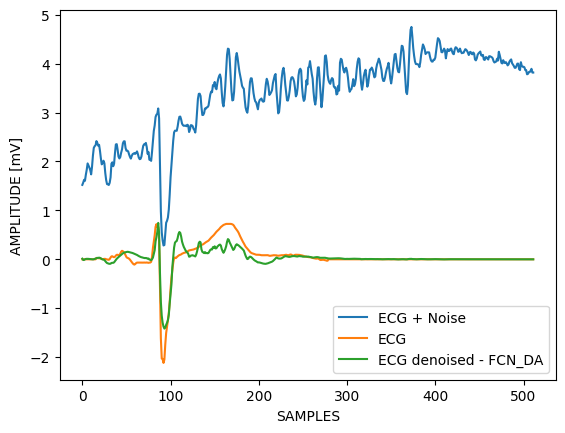

10146


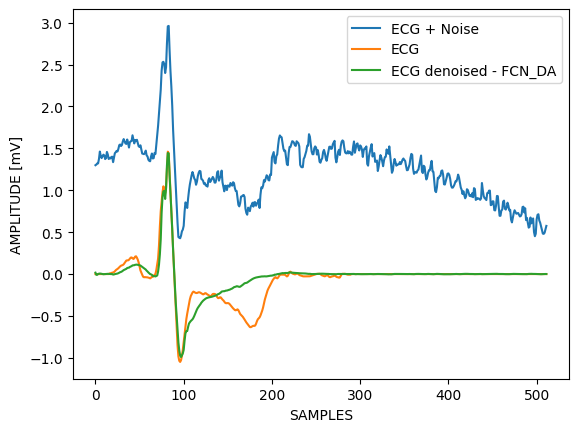

1444


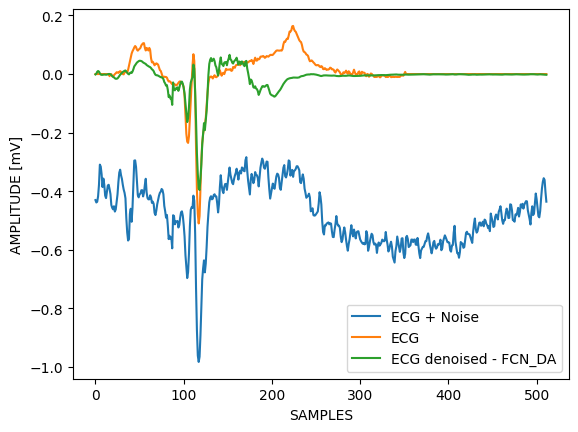

7500


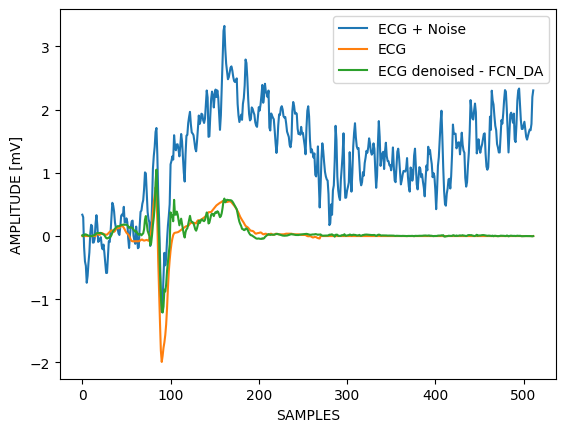

1554


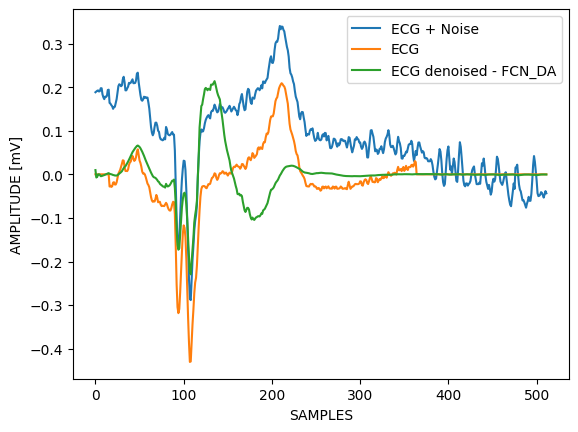

4804


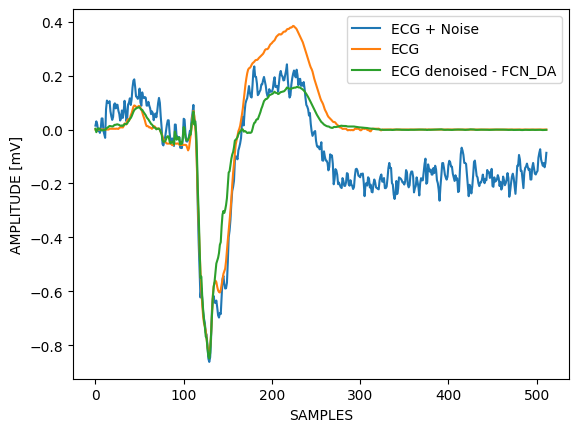

3188


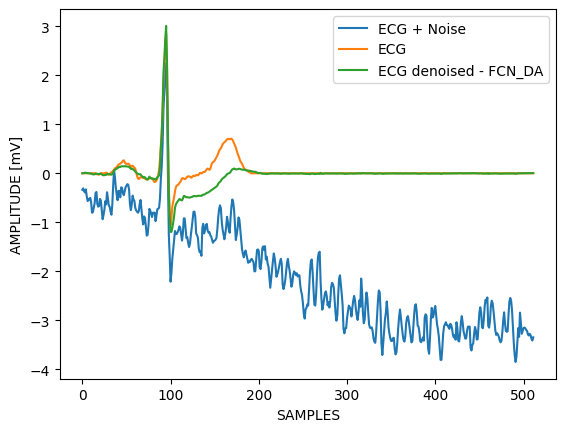

2066


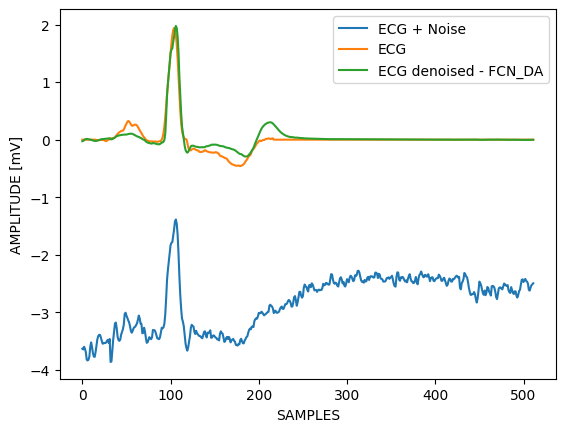

9697


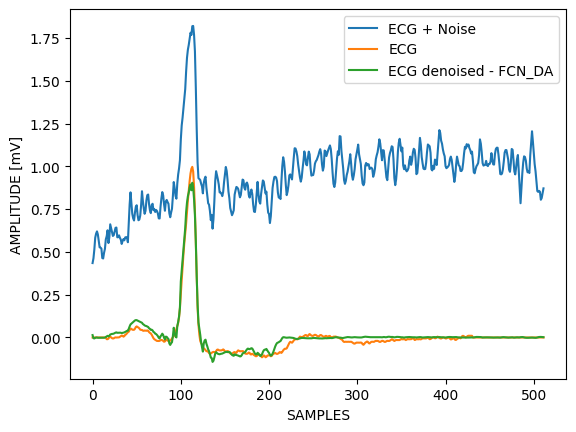

8541


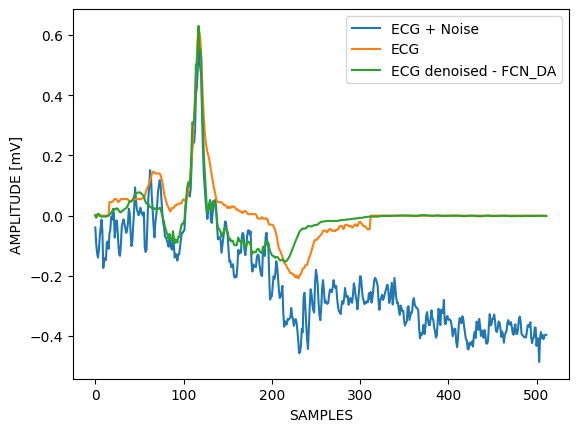

1800


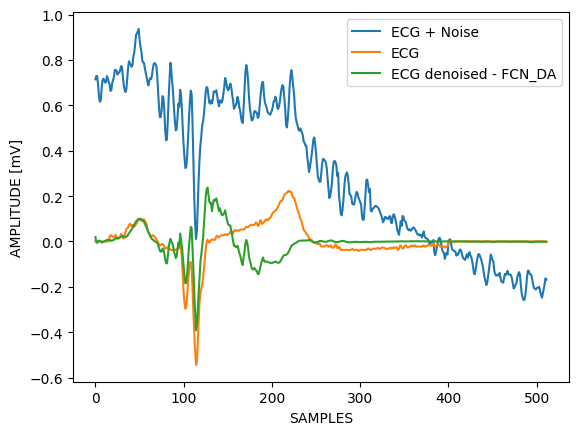

2884


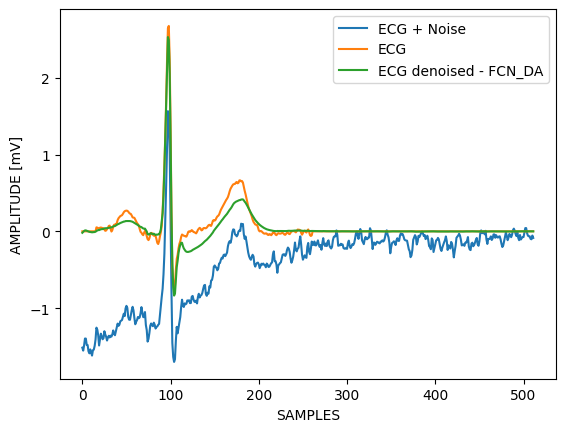

5941


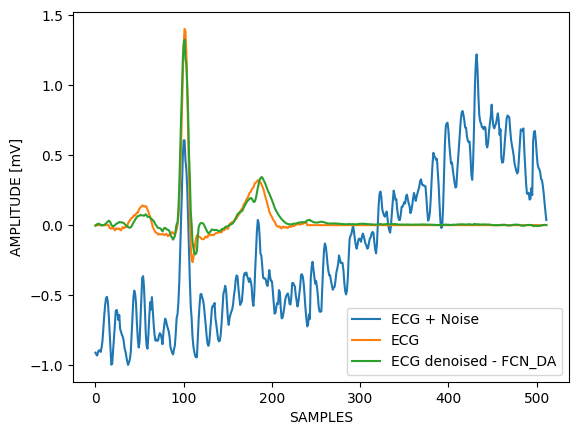

2379


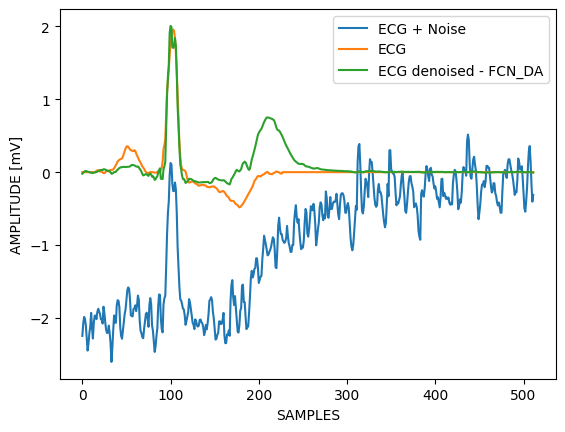

3460


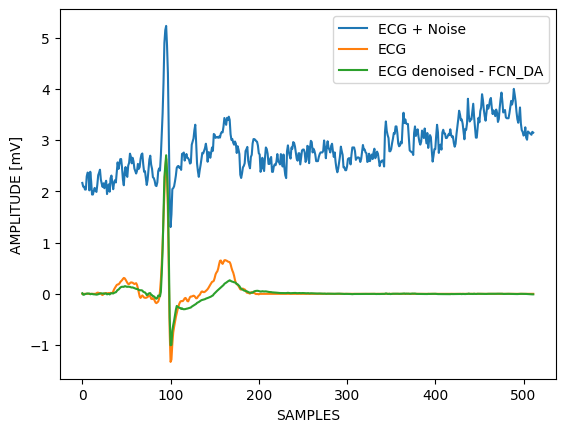

3103


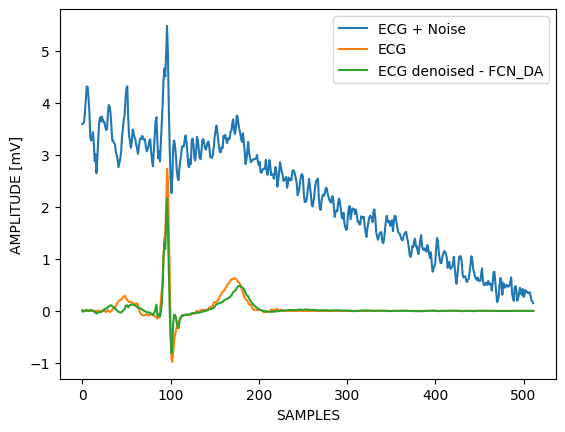

7575


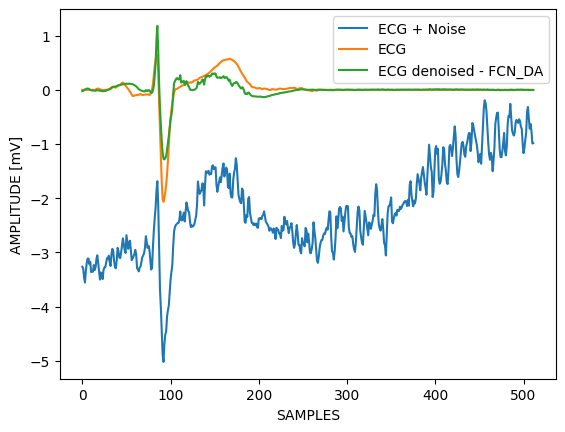

6885


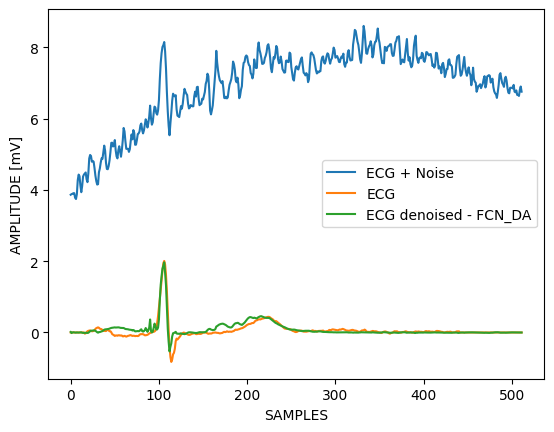

245


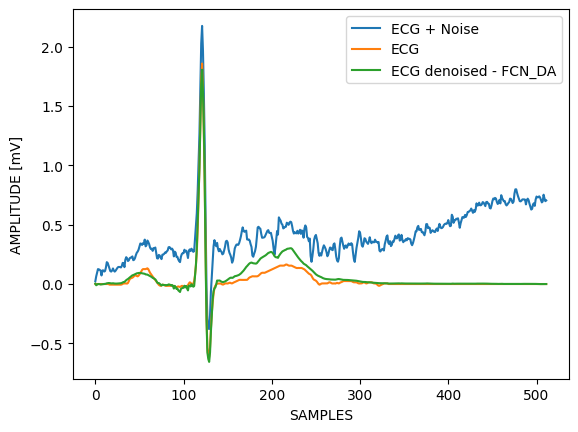

3547


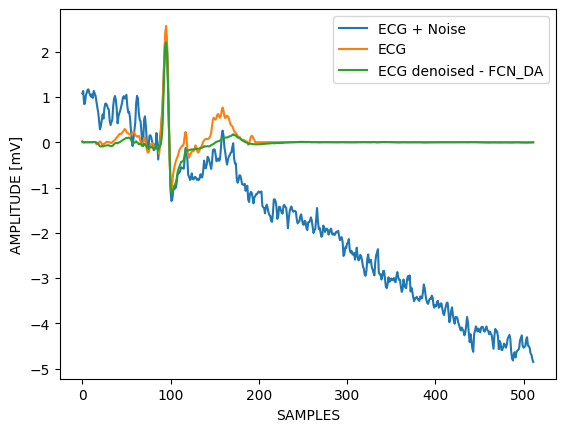

1838


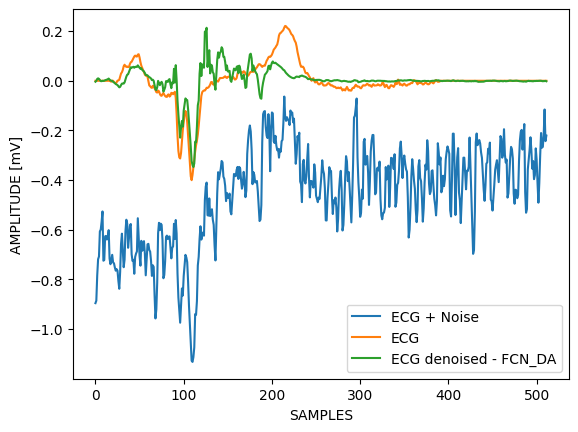

11854


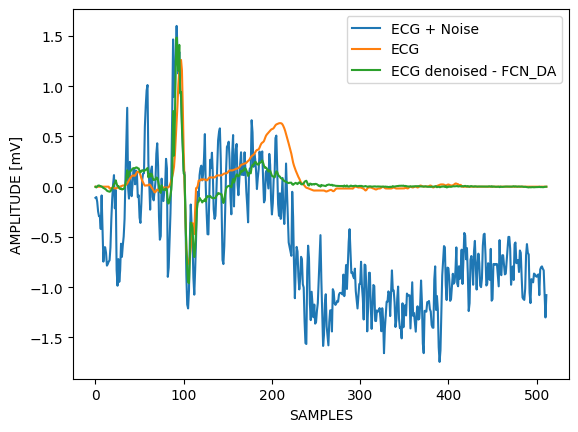

10783


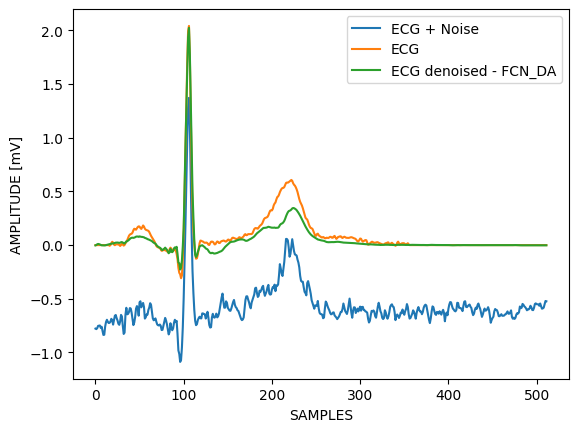

8231


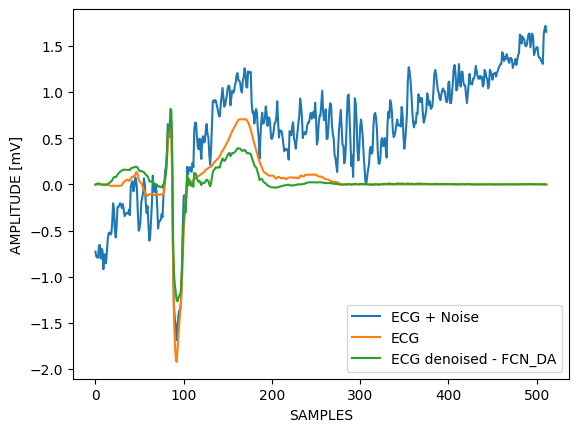

11318


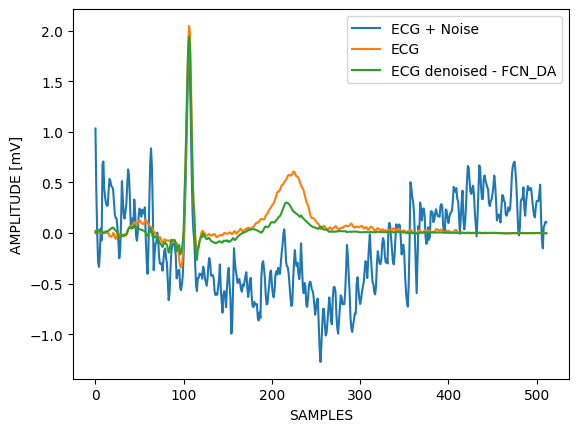

8376


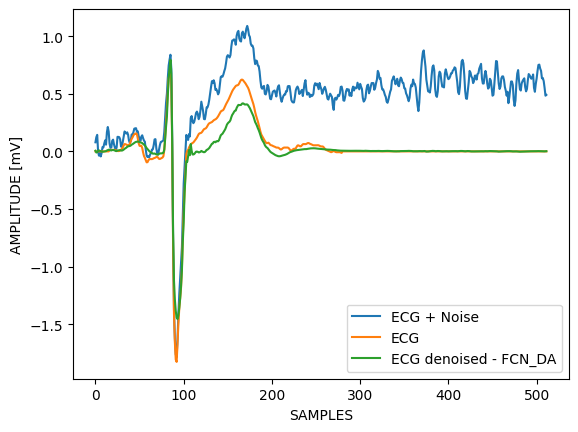

11635


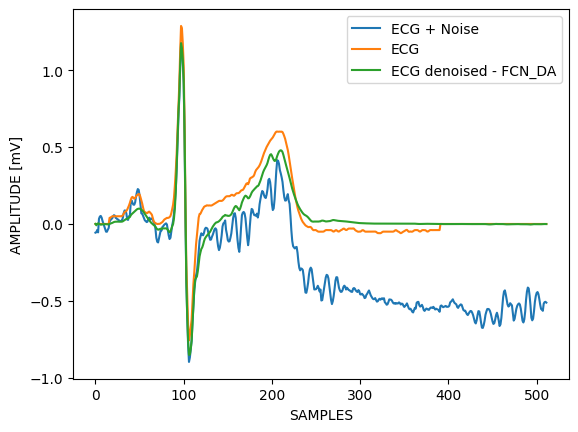

8355


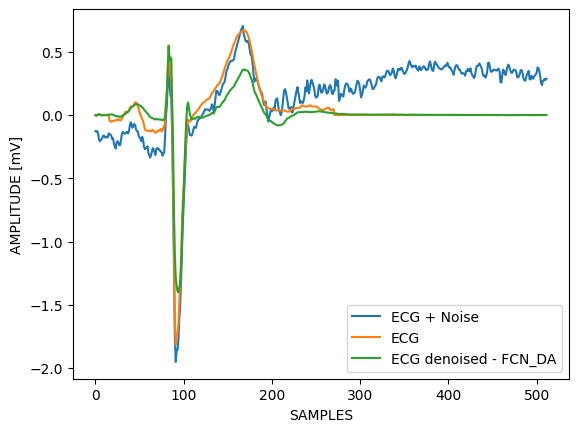

12859


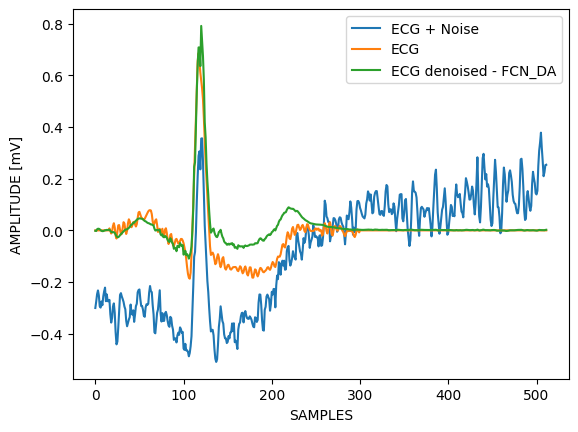

5846


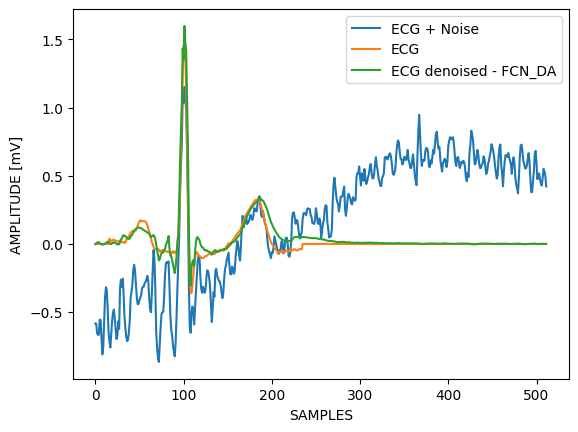

3093


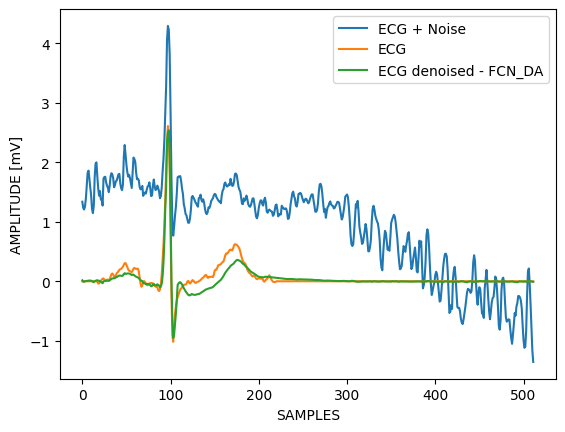

8439


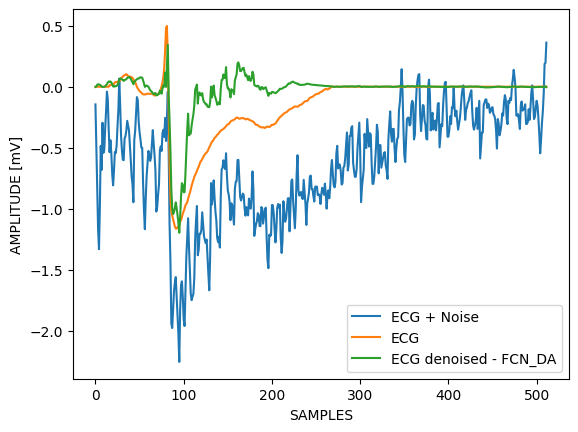

5901


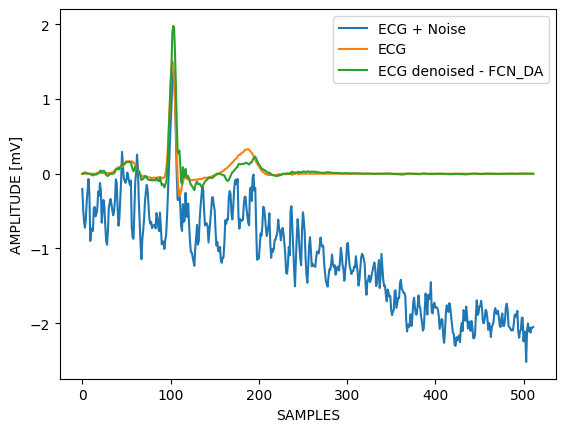

10357


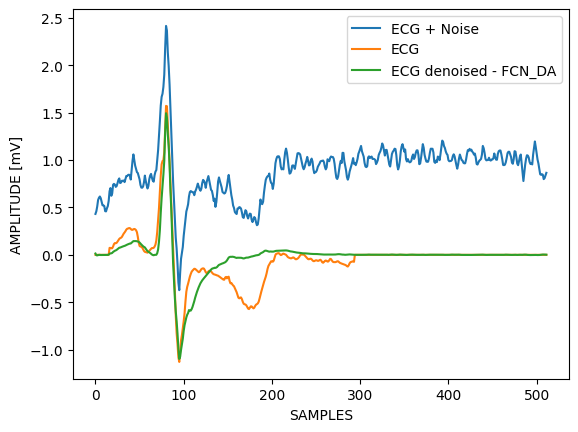

11022


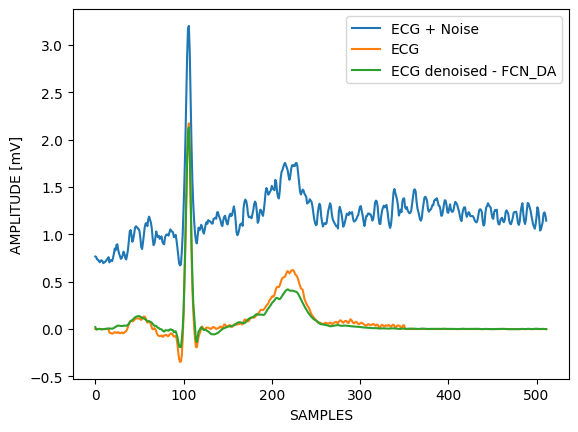

1679


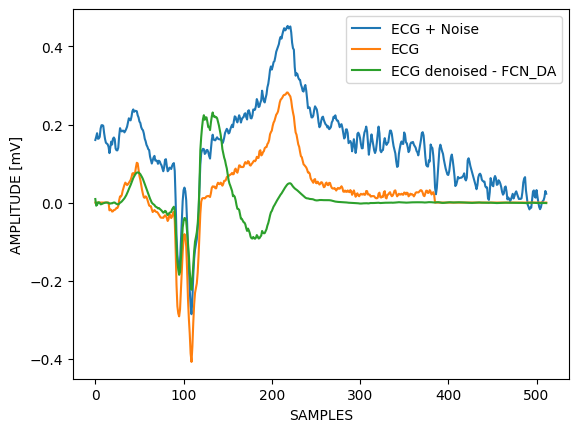

8508


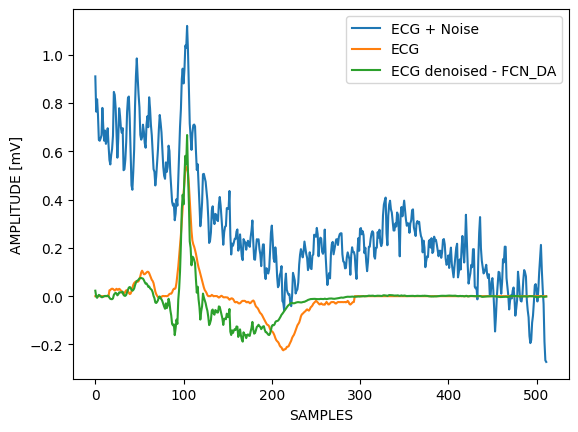

12211


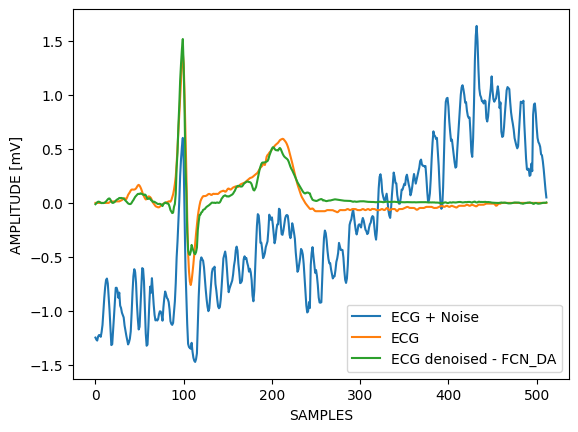

8014


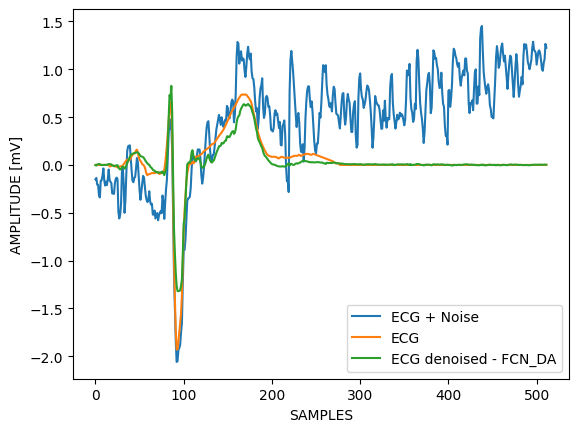

2500


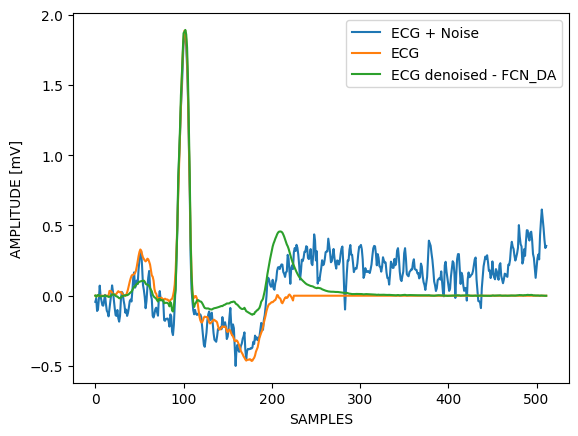

758


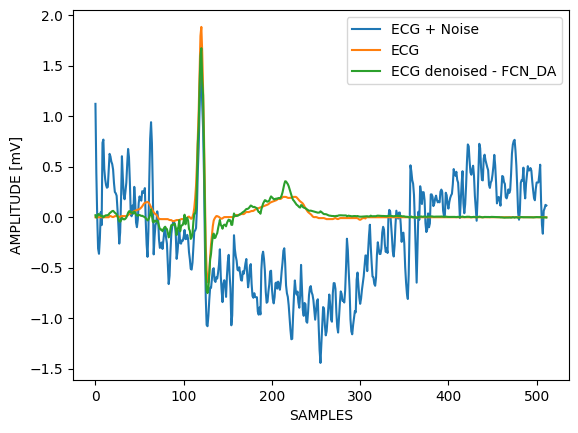

989


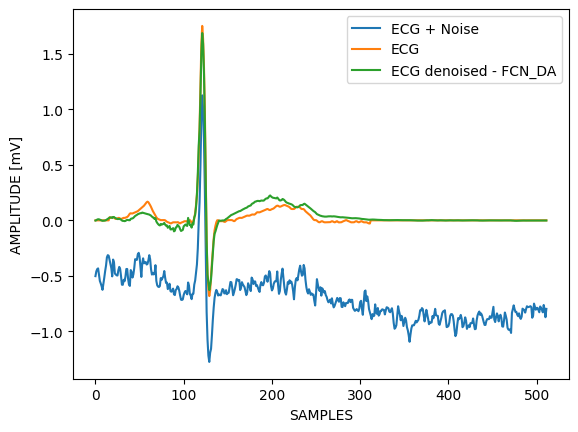

9513


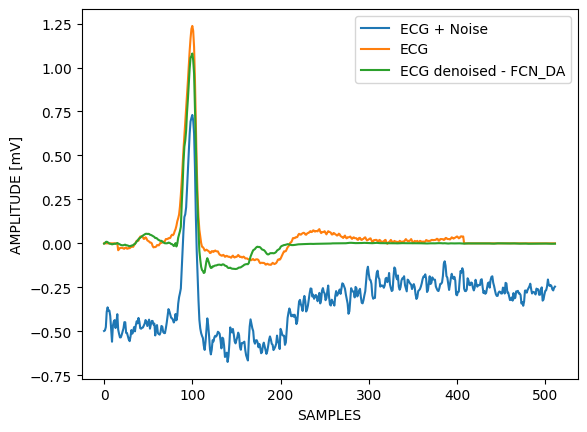

429


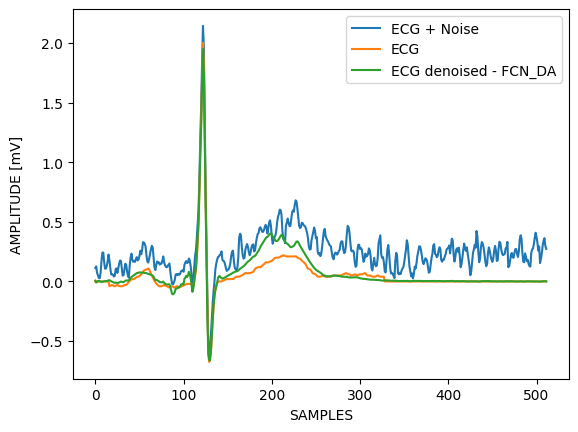

7613


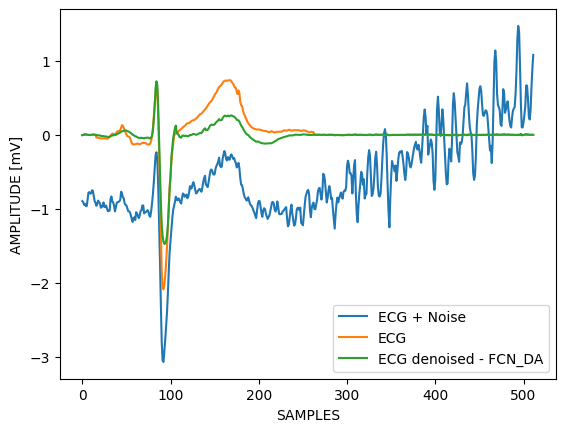

9661


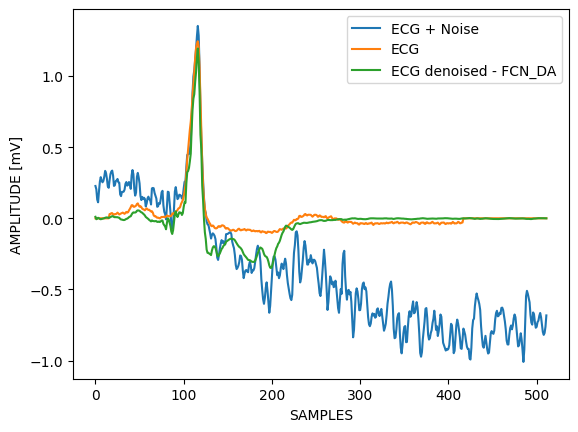

5682


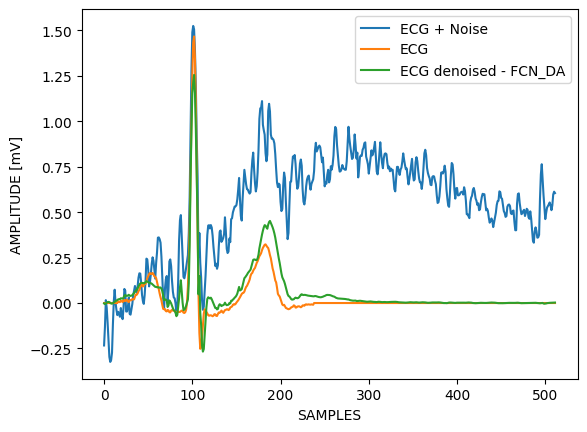

In [25]:
for x in np.random.randint(13000, size=50):
  print(x)
  plt.plot(X_test[x], label="ECG + Noise")
  plt.plot(y_test[x], label="ECG")
  plt.plot(y_pred[x], label="ECG denoised - FCN_DA")

  plt.xlabel("SAMPLES")
  plt.ylabel("AMPLITUDE [mV]")
  plt.legend()
  plt.show()

1


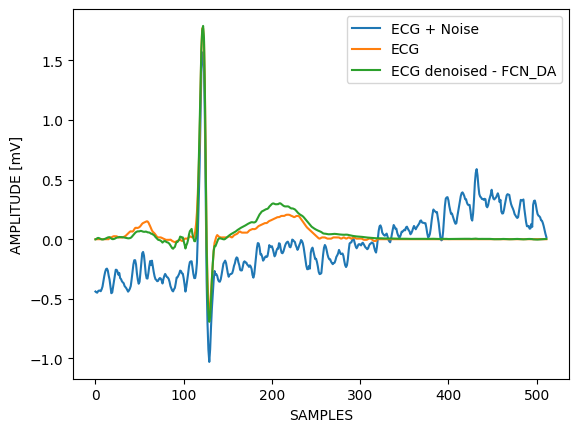

5


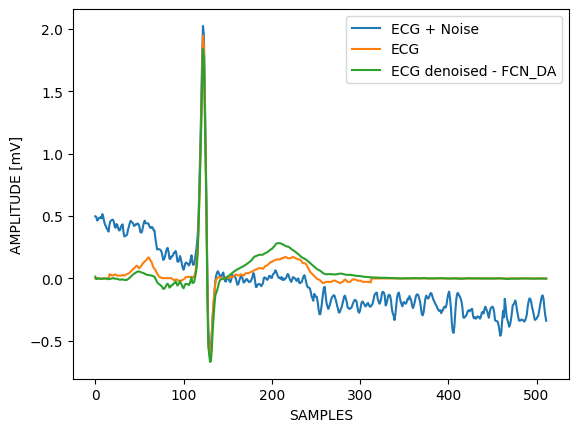

9


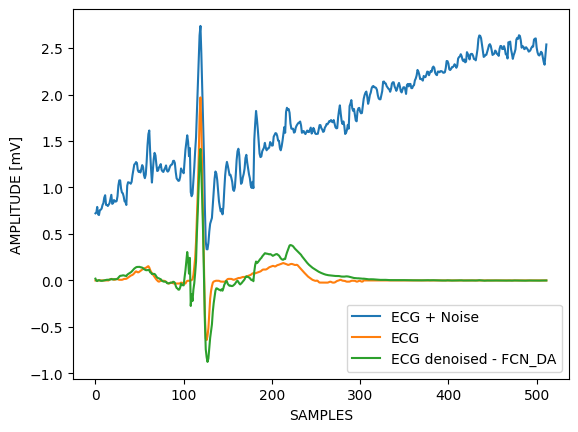

13


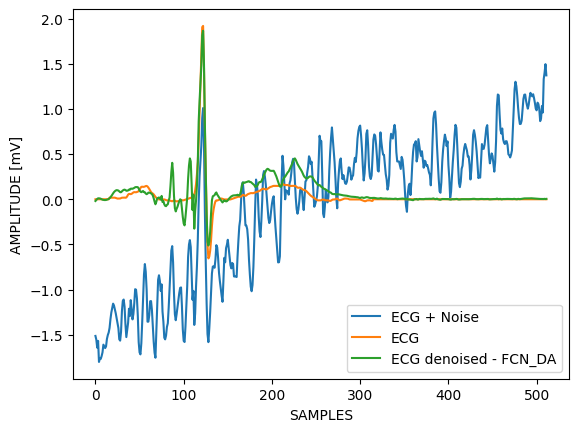

17


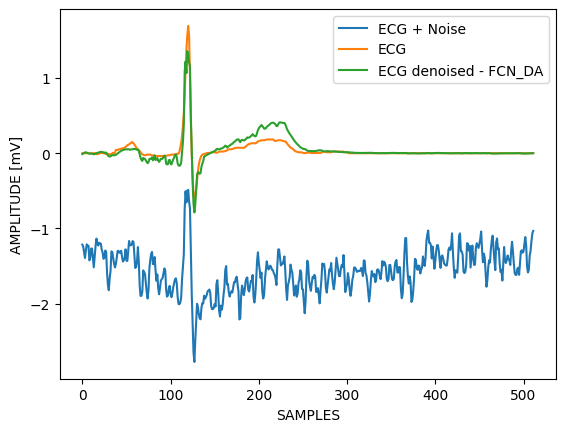

21


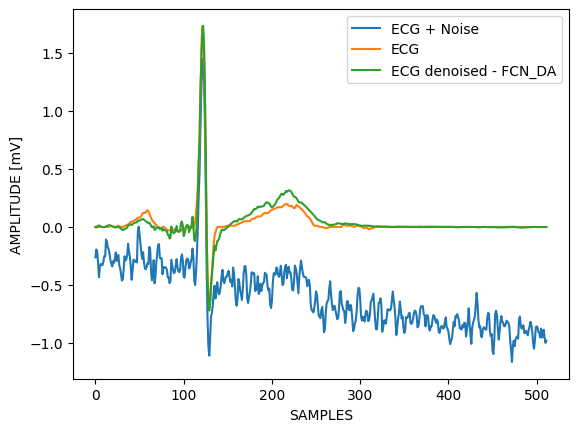

25


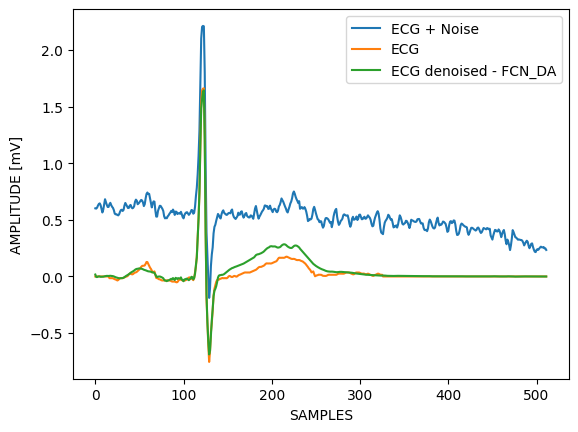

29


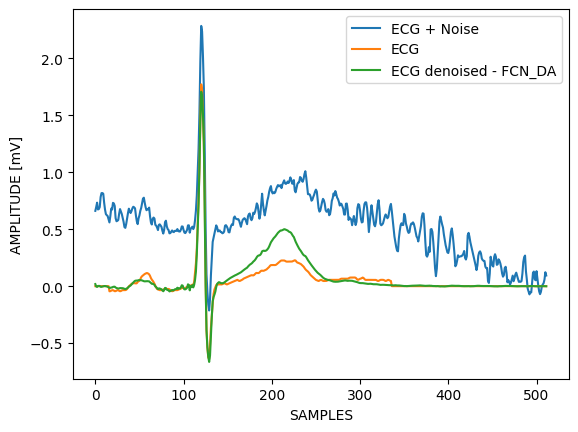

33


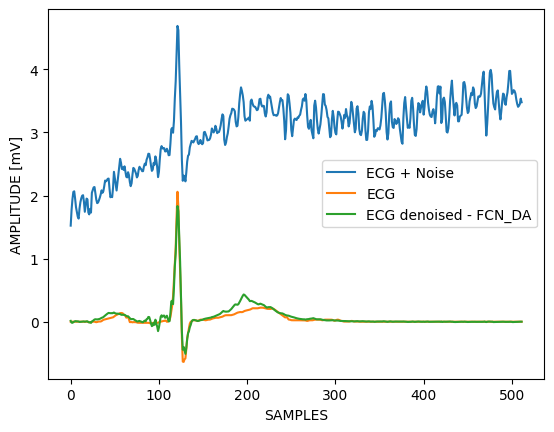

37


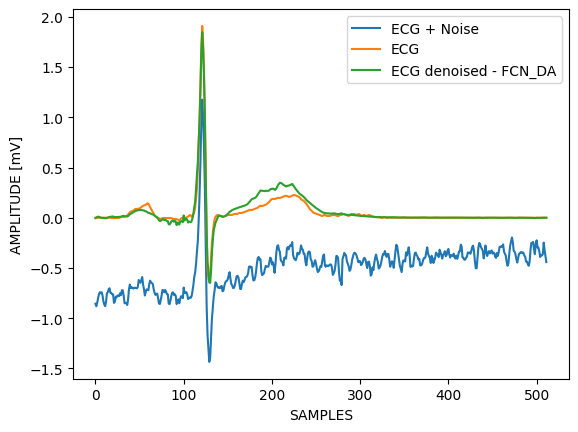

41


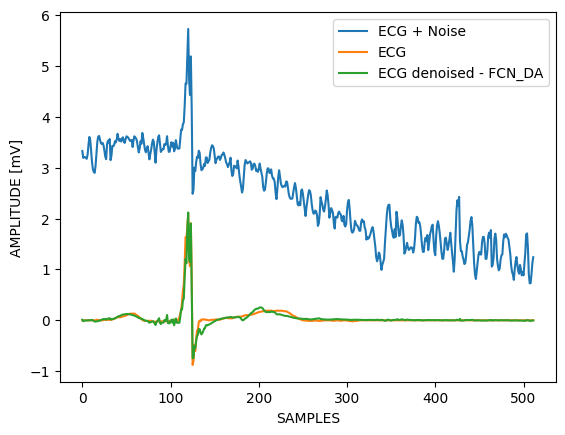

45


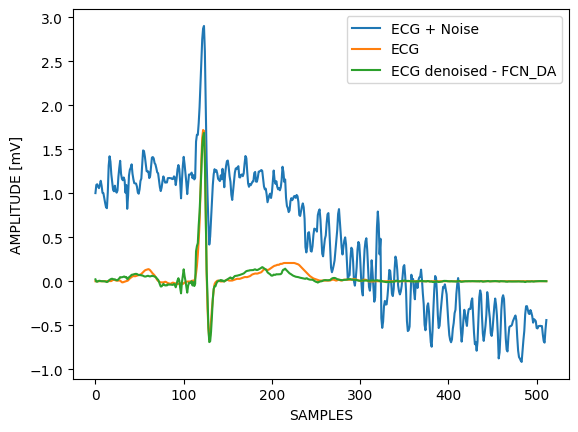

49


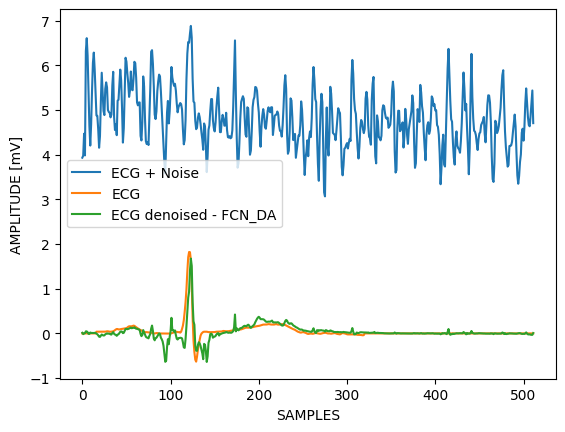

53


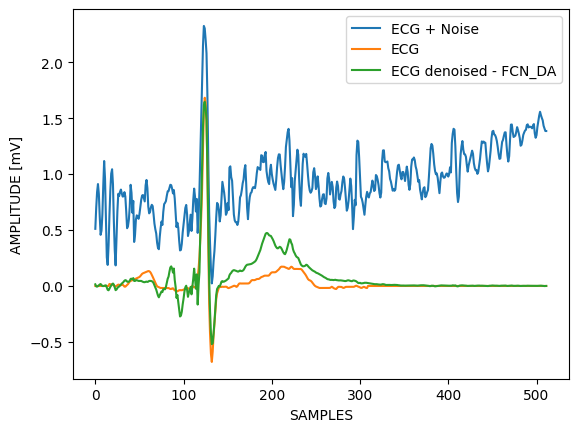

57


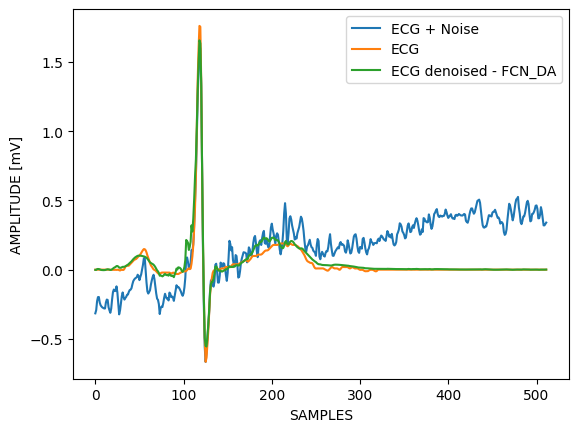

61


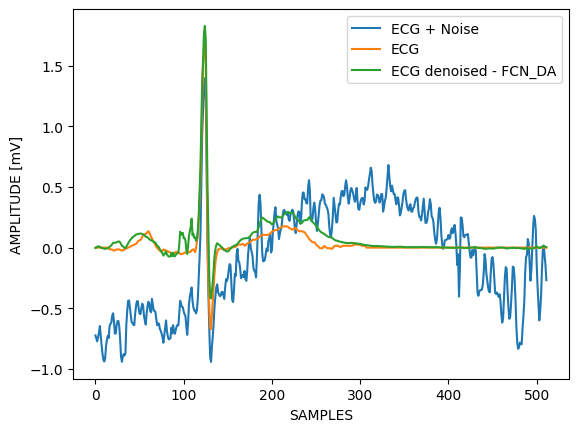

65


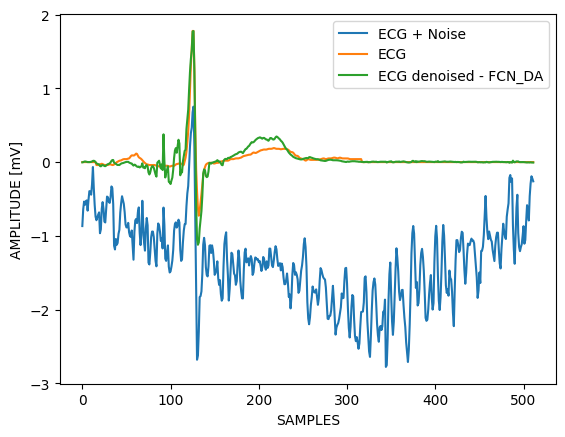

69


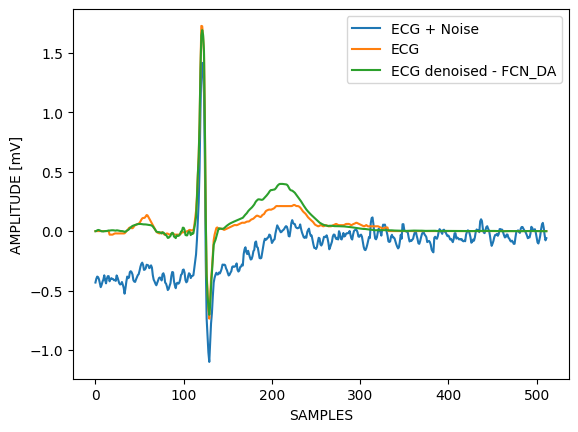

73


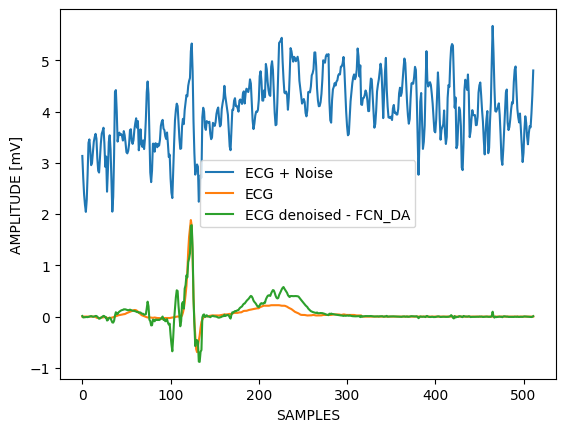

77


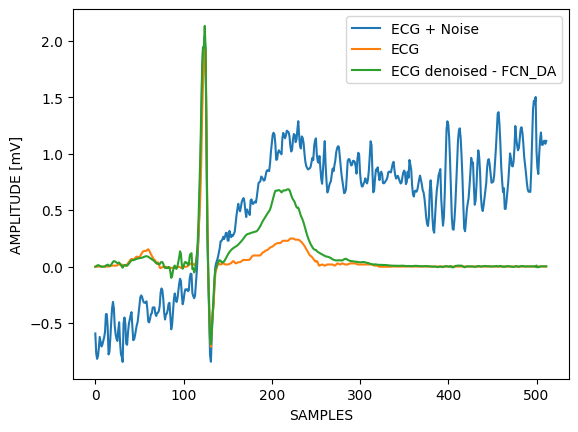

81


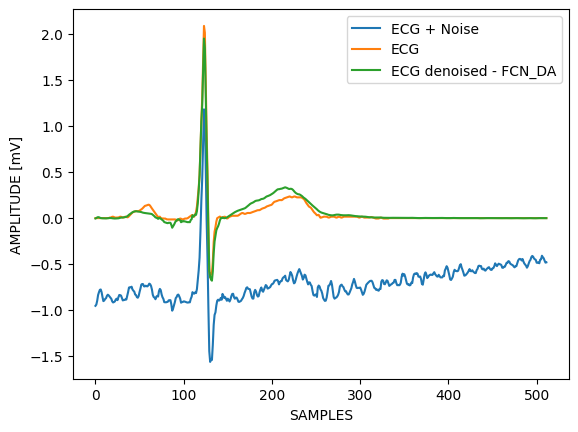

85


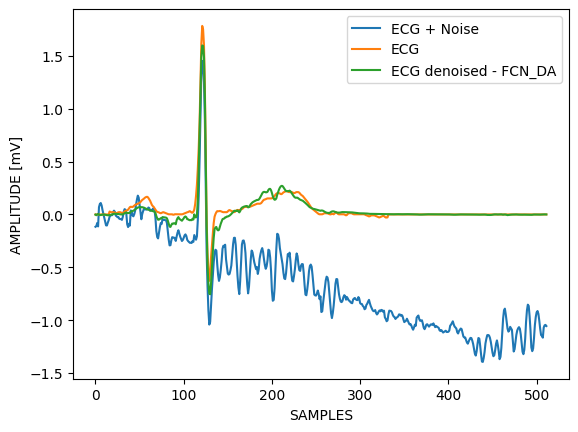

89


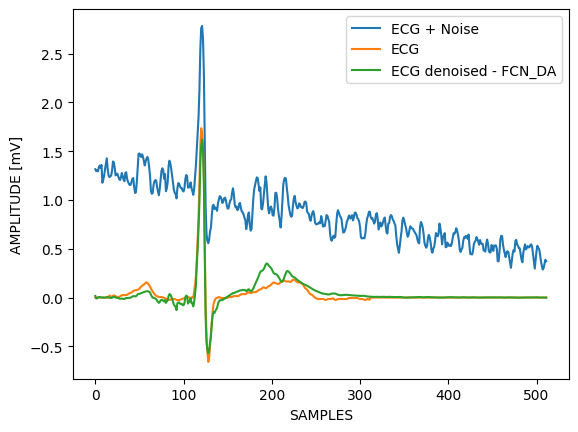

93


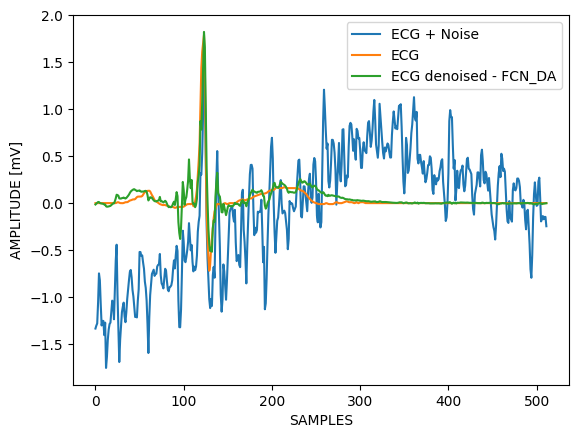

97


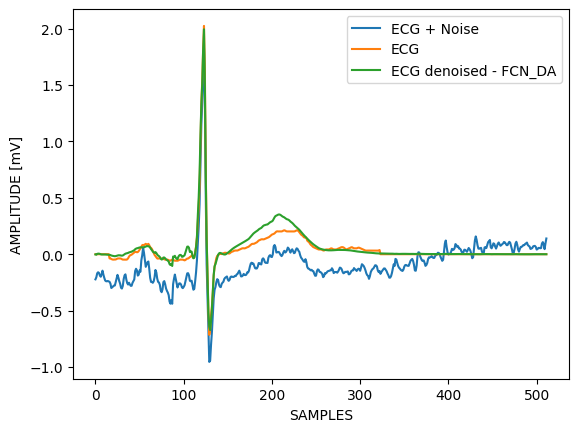

In [26]:
for x in range(1,100,4):
  print(x)
  plt.plot(X_test[x], label="ECG + Noise")
  plt.plot(y_test[x], label="ECG")
  plt.plot(y_pred[x], label="ECG denoised - FCN_DA")

  plt.xlabel("SAMPLES")
  plt.ylabel("AMPLITUDE [mV]")
  plt.legend()
  plt.show()